            BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.
            
            
Business Use Case
There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

Project Description
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.
About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 



You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.
 
Dataset Attributes
Here is the description of all the variables:
•	Variable: Definition
•	ID: Unique client ID
•	age: Age of the client
•	job: Type of job
•	marital: Marital status of the client
•	education: Education level
•	default: Credit in default.
•	housing: Housing loan
•	loan: Personal loan
•	contact: Type of communication
•	month: Contact month
•	day_of_week: Day of week of contact
•	duration: Contact duration
•	campaign: number of contacts performed during this campaign to the client
•	pdays: number of days that passed by after the client was last contacted
•	previous: number of contacts performed before this campaign
•	poutcome: outcome of the previous marketing campaign
Output variable (desired target):
•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)



In [208]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [209]:
#Loading the data
train=pd.read_csv(r'C:\Users\HP\Desktop\DSData-master\termdeposit_train.csv')
train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [210]:
#Loading the data
test=pd.read_csv(r'C:\Users\HP\Desktop\DSData-master\termdeposit_test.csv')
test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


we can see that we have 17 similar features in the both the dataset and 'Subscribed' is the variable that is to be predicted

PREPROCESSING

In [4]:
#finding the column names
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [5]:
finding the column names
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [6]:
#checking shape of both train and test data
print('The shape of train data is ',train.shape)
print('The shape of test data is ',test.shape)

The shape of train data is  (31647, 18)
The shape of test data is  (13564, 17)


In [7]:
#checking null values
train.isna().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

No null values presented

In [8]:
#fixing ID as index
train=train.set_index('ID')
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,,,,,,,,,,,,,,,,,
26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no


In [9]:
#checking the null values
test.isna().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [10]:
print (train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31647 entries, 26110 to 14156
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         31647 non-null  int64 
 1   job         31647 non-null  object
 2   marital     31647 non-null  object
 3   education   31647 non-null  object
 4   default     31647 non-null  object
 5   balance     31647 non-null  int64 
 6   housing     31647 non-null  object
 7   loan        31647 non-null  object
 8   contact     31647 non-null  object
 9   day         31647 non-null  int64 
 10  month       31647 non-null  object
 11  duration    31647 non-null  int64 
 12  campaign    31647 non-null  int64 
 13  pdays       31647 non-null  int64 
 14  previous    31647 non-null  int64 
 15  poutcome    31647 non-null  object
 16  subscribed  31647 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 1

In [11]:
#seperating the categorical column and numerical column
categorical_col=[]
for i in train.dtypes.index:
    if train.dtypes[i] == "object":
        categorical_col.append(i)
print("categorical column: ", categorical_col)
print("\n")

numerical_col=[]
for i in train.dtypes.index:
    if train.dtypes[i]!="object":
        numerical_col.append(i)
print("numerical column: ", numerical_col)
print("\n")


categorical column:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']


numerical column:  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']




In [12]:
#checking unique values of train dataset
train.nunique().to_frame("Unique values")

,Unique values
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3
day,31


In [13]:
#finding count value for target
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

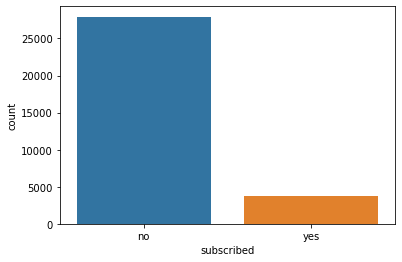

In [14]:
#plotting countplot
ax=sns.countplot(x='subscribed',data=train)

In [15]:
#checking the value counts for all columns
for k in train.columns:
    print(train[k].value_counts())
    print('\n')

32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64


blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


no     31062
yes      585
Name: default, dtype: int64


 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 2968        1
Name: balance, Length: 6326, dtype: int64


yes    17584
no     14063
Name: housing, dtype: int64


no     26516
yes     5131
Name: loan, 

Visualization

Univariate Analysis

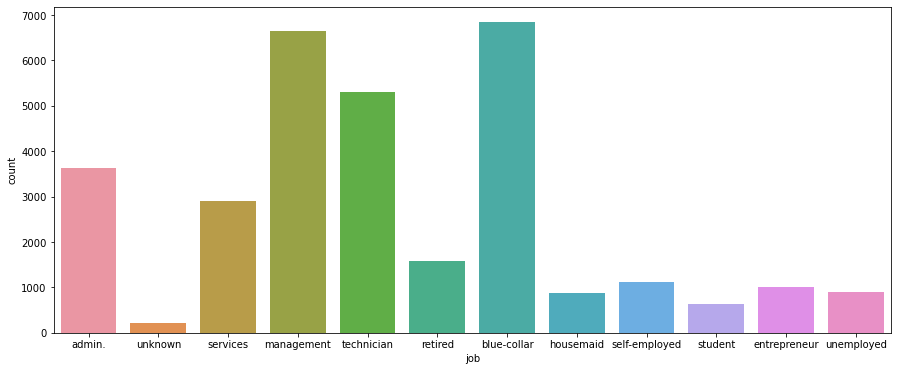

In [16]:
#plotting countplot for Job 
plt.figure(figsize=(15,6))
ax=sns.countplot(x='job',data=train)

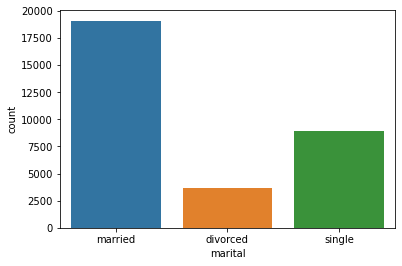

In [17]:

#plotting countplot for marital
ax=sns.countplot(x='marital',data=train)


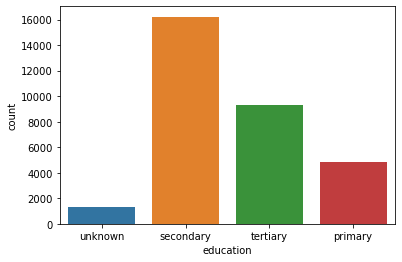

In [18]:
#plotting countplot for education
ax=sns.countplot(x='education',data=train)

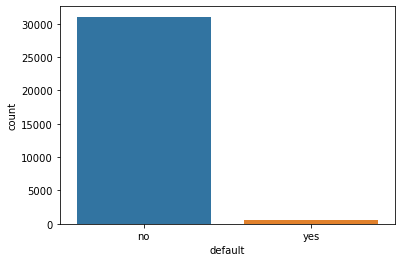

In [19]:
#countplot for default
ax=sns.countplot(x='default',data=train)

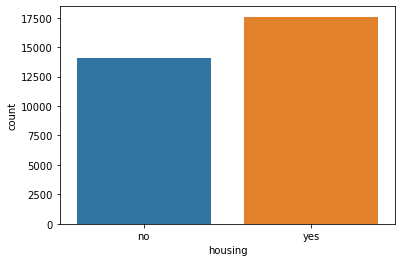

In [20]:
#countplot for housing
ax=sns.countplot(x='housing',data=train)

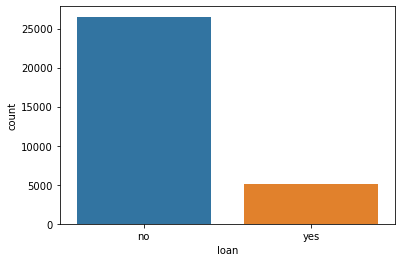

In [21]:
#countplot for loan
ax=sns.countplot(x='loan',data=train)

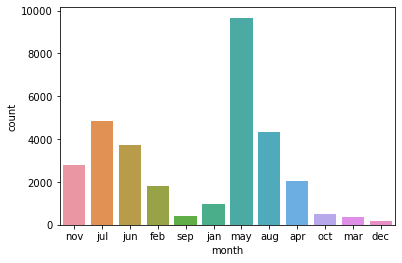

In [22]:
#countplot for month
ax=sns.countplot(x='month',data=train)

In [23]:
#finding count values for the job
train['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

<AxesSubplot:>

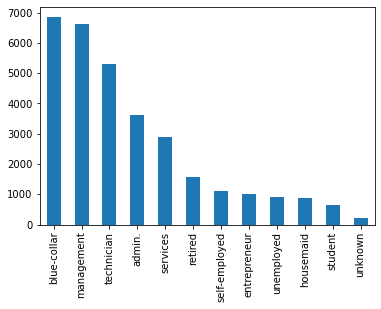

In [24]:
#plotting job frequemcy
train['job'].value_counts().plot.bar()

<AxesSubplot:xlabel='age', ylabel='Density'>

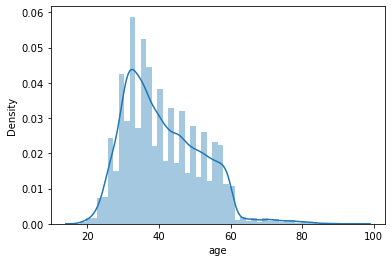

In [25]:
#plotting distribution plot for age column
sns.distplot(train['age'])

Bivariate anlysis

<AxesSubplot:xlabel='subscribed', ylabel='duration'>

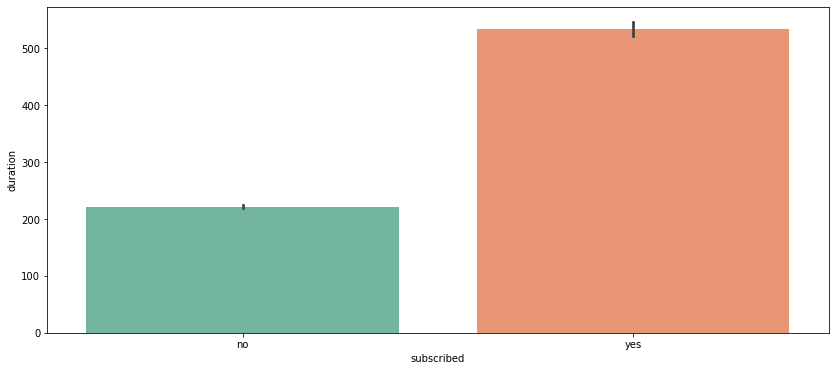

In [26]:
#checking relationship between duration and target
plt.figure(figsize=(14,6))
sns.barplot(y = 'duration', x = 'subscribed', data =train, palette = 'Set2')

<AxesSubplot:xlabel='subscribed', ylabel='age'>

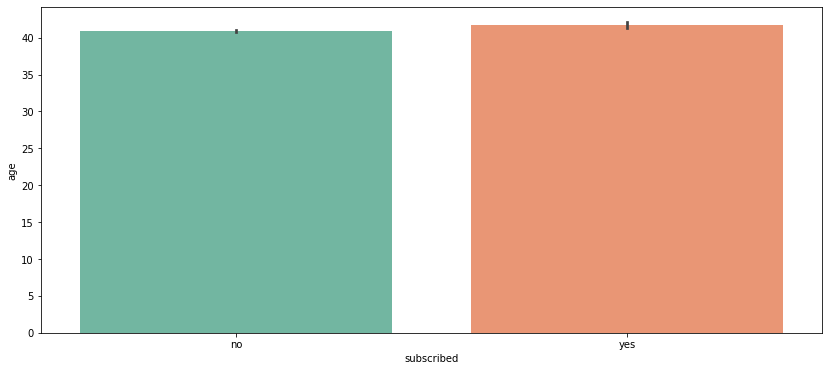

In [27]:
#checking relationship between age and target
plt.figure(figsize=(14,6))
sns.barplot(y = 'age', x = 'subscribed', data =train, palette = 'Set2')

<AxesSubplot:xlabel='subscribed', ylabel='campaign'>

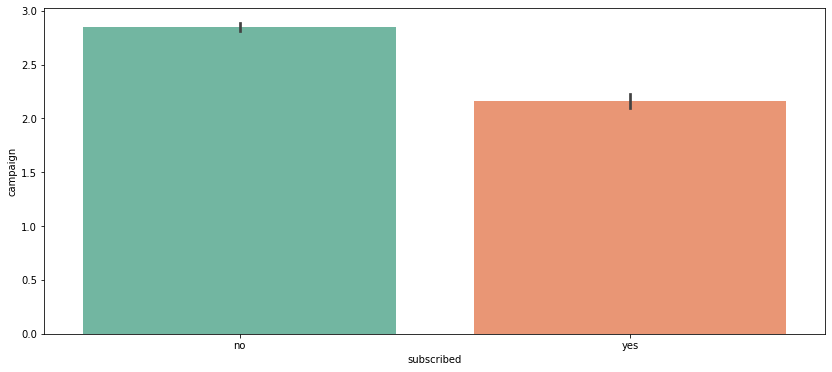

In [28]:
#checking relationship between campaign and target
plt.figure(figsize=(14,6))
sns.barplot(y = 'campaign', x = 'subscribed', data =train, palette = 'Set2')

<AxesSubplot:xlabel='subscribed', ylabel='pdays'>

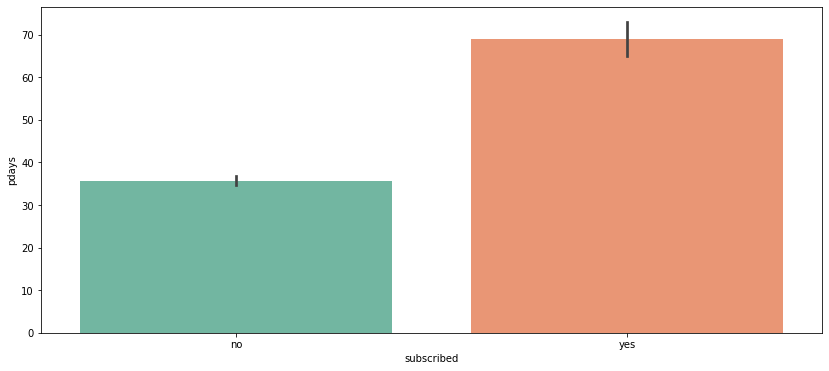

In [29]:
#checking relationship between pdays and target
plt.figure(figsize=(14,6))
sns.barplot(y = 'pdays', x = 'subscribed', data =train, palette = 'Set2')

<AxesSubplot:xlabel='subscribed', ylabel='day'>

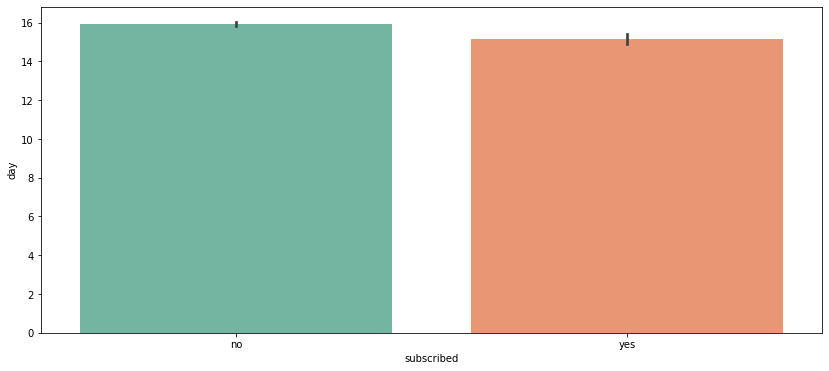

In [30]:
#checking relationship between day and target
plt.figure(figsize=(14,6))
sns.barplot(y = 'day', x = 'subscribed', data =train, palette = 'Set2')

<AxesSubplot:xlabel='subscribed', ylabel='balance'>

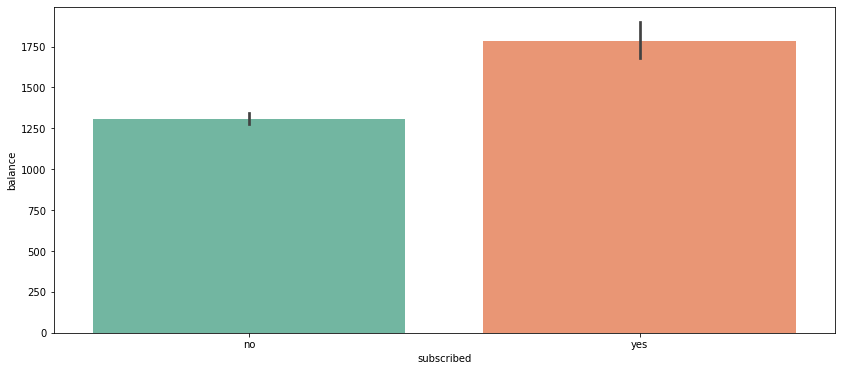

In [31]:
#checking relationship between balance and target
plt.figure(figsize=(14,6))
sns.barplot(y = 'balance', x = 'subscribed', data =train, palette = 'Set2')

<AxesSubplot:xlabel='subscribed', ylabel='previous'>

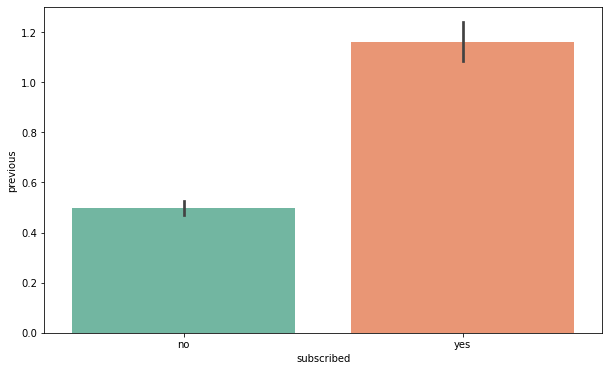

In [32]:
#checking relationship between previous and target
plt.figure(figsize=(10,6))
sns.barplot(y = 'previous', x = 'subscribed', data =train, palette = 'Set2')

Except campaign columns remaining column has strong relationship with target. more chances for subscribed.

In [33]:
#summary of the dataset
train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


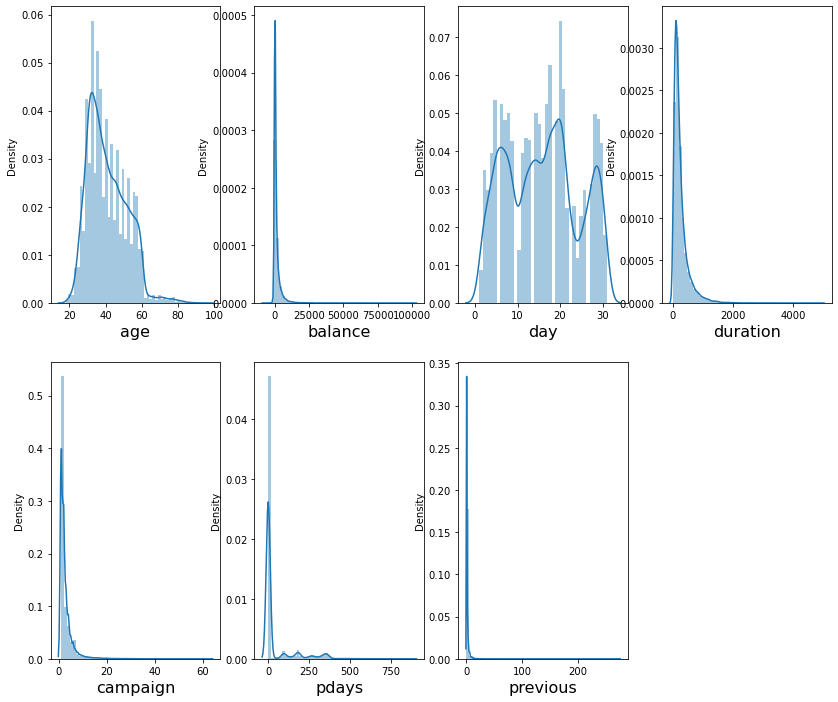

In [34]:
#plotting distplot
plt.figure(figsize=(14,12),facecolor="white")
plotnumber=1
for columns in numerical_col:
    if plotnumber<=7:
    
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(train[columns])
        plt.xlabel(columns, fontsize=16)
    plotnumber+=1
plt.show()

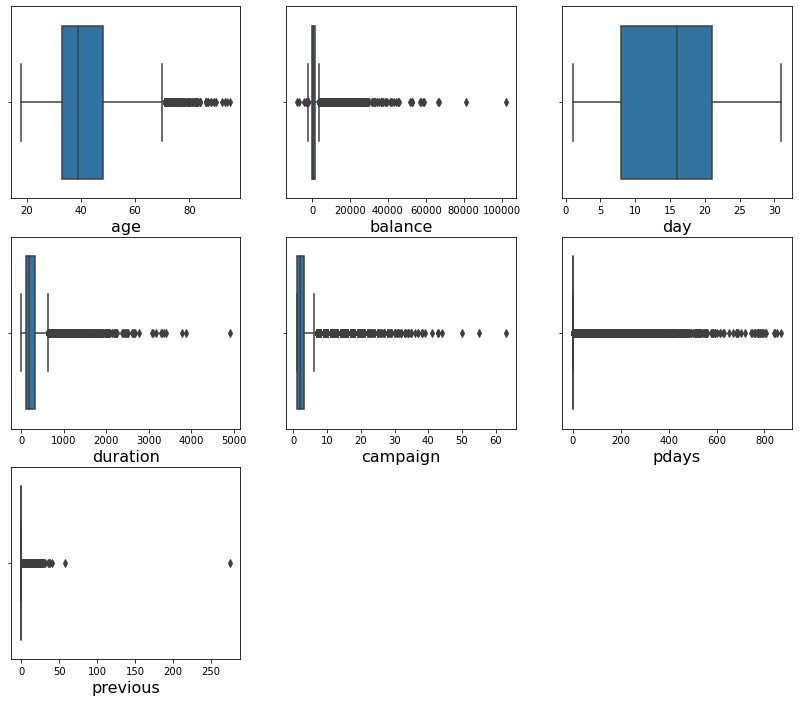

In [35]:
#ploting the boxplot
plt.figure(figsize=(14,12),facecolor="white")
plotnumber=1
for columns in numerical_col:
    if plotnumber<=7:
    
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(train[columns])
        plt.xlabel(columns, fontsize=16)
        plt.yticks(rotation=0,fontsize=16)
    plotnumber+=1
plt.show()

from the above two plots it is clearly showing that there is skewness and outliers 

In [36]:
#removing some outliers
train['age']=train['age'].replace(0,train['age'].mean())
train['balance']=train['balance'].replace(0,train['balance'].mean())
train['duration']=train['duration'].replace(0,train['duration'].mean())
train['campaign']=train['campaign'].replace(0,train['campaign'].mean())


In [37]:
#quantiles for train data
q1=train.quantile(0.25)
q3=train.quantile(0.75)
iqr=q3-q1

In [38]:
balance_high=q3.balance+1.5*iqr.balance
balance_high

index=np.where(train['balance']>balance_high)

age_high=q3.age+1.5*iqr.age
age_high

index=np.where(train['age']>age_high)

duration_high=q3.duration+1.5*iqr.duration
duration_high

index=np.where(train['duration']>duration_high)

campaign_high=q3.campaign+1.5*iqr.campaign
campaign_high

index=np.where(train['campaign']>campaign_high)




train=train.drop(train.index[index])
train.shape

train.reset_index()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933.000000,no,no,telephone,19,nov,44.0,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3.000000,no,no,cellular,20,jul,91.0,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891.000000,yes,no,cellular,18,jul,240.0,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287.000000,no,no,cellular,22,jun,867.0,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119.000000,yes,no,cellular,4,feb,380.0,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29516,9476,37,technician,single,tertiary,no,1309.000000,no,no,unknown,6,jun,442.0,2,-1,0,unknown,no
29517,36483,29,management,single,tertiary,no,1363.890258,yes,no,cellular,12,may,116.0,2,-1,0,unknown,no
29518,40178,53,management,divorced,tertiary,no,380.000000,no,yes,cellular,5,jun,438.0,2,-1,0,unknown,yes
29519,19710,32,management,single,tertiary,no,312.000000,no,no,cellular,7,aug,37.0,3,-1,0,unknown,no


In [39]:

train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,,,,,,,,,,,,,,,,,
26110,56,admin.,married,unknown,no,1933.000000,no,no,telephone,19,nov,44.0,2,-1,0,unknown,no
40576,31,unknown,married,secondary,no,3.000000,no,no,cellular,20,jul,91.0,2,-1,0,unknown,no
15320,27,services,married,secondary,no,891.000000,yes,no,cellular,18,jul,240.0,1,-1,0,unknown,no
43962,57,management,divorced,tertiary,no,3287.000000,no,no,cellular,22,jun,867.0,1,84,3,success,yes
29842,31,technician,married,secondary,no,119.000000,yes,no,cellular,4,feb,380.0,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9476,37,technician,single,tertiary,no,1309.000000,no,no,unknown,6,jun,442.0,2,-1,0,unknown,no
36483,29,management,single,tertiary,no,1363.890258,yes,no,cellular,12,may,116.0,2,-1,0,unknown,no
40178,53,management,divorced,tertiary,no,380.000000,no,yes,cellular,5,jun,438.0,2,-1,0,unknown,yes


In [40]:
data_loss=(31647-25921)/31647*100
data_loss


18.093342180933423

In [42]:
#finding skewness
train.skew()

age          0.688387
balance      8.220931
day          0.121367
duration     3.234234
campaign     1.231159
pdays        2.571115
previous    49.964192
dtype: float64

In [43]:
#applying the power transformation
train['previous']=np.cbrt(train['previous'])

In [44]:
#checking skewness
train.skew()

age         0.688387
balance     8.220931
day         0.121367
duration    3.234234
campaign    1.231159
pdays       2.571115
previous    2.000008
dtype: float64

Encoding categorical_column:


In [45]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in train.columns:
    if train[i].dtypes=='object':
        train[i]=OE.fit_transform(train[i].values.reshape(-1,1))
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,,,,,,,,,,,,,,,,,
26110,56,0.0,1.0,3.0,0.0,1933.000000,0.0,0.0,1.0,19,9.0,44.0,2,-1,0.00000,3.0,0.0
40576,31,11.0,1.0,1.0,0.0,3.000000,0.0,0.0,0.0,20,5.0,91.0,2,-1,0.00000,3.0,0.0
15320,27,7.0,1.0,1.0,0.0,891.000000,1.0,0.0,0.0,18,5.0,240.0,1,-1,0.00000,3.0,0.0
43962,57,4.0,0.0,2.0,0.0,3287.000000,0.0,0.0,0.0,22,6.0,867.0,1,84,1.44225,2.0,1.0
29842,31,9.0,1.0,1.0,0.0,119.000000,1.0,0.0,0.0,4,3.0,380.0,1,-1,0.00000,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9476,37,9.0,2.0,2.0,0.0,1309.000000,0.0,0.0,2.0,6,6.0,442.0,2,-1,0.00000,3.0,0.0
36483,29,4.0,2.0,2.0,0.0,1363.890258,1.0,0.0,0.0,12,8.0,116.0,2,-1,0.00000,3.0,0.0
40178,53,4.0,0.0,2.0,0.0,380.000000,0.0,1.0,0.0,5,6.0,438.0,2,-1,0.00000,3.0,1.0


In [46]:
train.nunique().to_frame("Unique values")

,Unique values
age,75
job,12
marital,3
education,4
default,2
balance,6129
housing,2
loan,2
contact,3
day,31


In [47]:
#corelation b/n features and target variable.
corr=train.corr()
corr

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.016883,-0.407584,-0.101189,-0.017014,0.108644,-0.184168,-0.013788,0.028288,-0.012614,-0.035020,-0.001721,0.027907,-0.021552,0.005743,0.005550,0.027068
job,-0.016883,1.000000,0.066022,0.168334,-0.008917,0.024510,-0.126369,-0.036550,-0.075685,0.018121,-0.082505,0.005024,0.008345,-0.022471,0.000748,0.007111,0.042328
marital,-0.407584,0.066022,1.000000,0.106600,-0.008709,-0.002419,-0.018397,-0.041675,-0.044713,-0.005460,-0.005222,0.012317,-0.031874,0.020735,0.027740,-0.020387,0.047286
education,-0.101189,0.168334,0.106600,1.000000,-0.008015,0.066164,-0.094499,-0.044062,-0.112544,0.015280,-0.052211,0.006425,-0.013349,-0.000010,0.031854,-0.020429,0.068129
default,-0.017014,-0.008917,-0.008709,-0.008015,1.000000,-0.065133,-0.011488,0.080046,0.017449,0.007590,0.008221,-0.008676,0.005645,-0.028747,-0.036398,0.034195,-0.018804
balance,0.108644,0.024510,-0.002419,0.066164,-0.065133,1.000000,-0.073637,-0.083912,-0.028219,0.008280,0.022451,0.023859,-0.019281,-0.002724,0.023302,-0.016364,0.047241
housing,-0.184168,-0.126369,-0.018397,-0.094499,-0.011488,-0.073637,1.000000,0.037614,0.186270,-0.013982,0.256611,0.001525,-0.030538,0.117696,0.049285,-0.091125,-0.147899
loan,-0.013788,-0.036550,-0.041675,-0.044062,0.080046,-0.083912,0.037614,1.000000,-0.005513,0.012958,0.023754,-0.012229,0.004341,-0.020525,-0.025738,0.011675,-0.074632
contact,0.028288,-0.075685,-0.044713,-0.112544,0.017449,-0.028219,0.186270,-0.005513,1.000000,-0.014731,0.353344,-0.017353,-0.008919,-0.250257,-0.279303,0.278038,-0.154377
day,-0.012614,0.018121,-0.005460,0.015280,0.007590,0.008280,-0.013982,0.012958,-0.014731,1.000000,0.023503,-0.021884,0.099262,-0.074785,-0.063649,0.063199,-0.023357


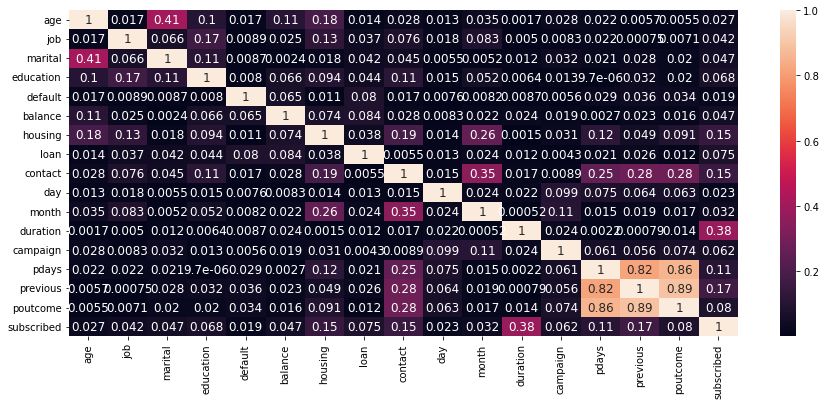

In [48]:
df_corr=train.corr().abs()
plt.figure(figsize=(15,6))
sns.heatmap(df_corr, annot=True, linecolor='blue', annot_kws={'size':12},)
plt.show()

In [49]:
corr['subscribed'].sort_values(ascending=False)

subscribed    1.000000
duration      0.381940
previous      0.170602
pdays         0.108546
education     0.068129
marital       0.047286
balance       0.047241
job           0.042328
age           0.027068
default      -0.018804
day          -0.023357
month        -0.031926
campaign     -0.062389
loan         -0.074632
poutcome     -0.079707
housing      -0.147899
contact      -0.154377
Name: subscribed, dtype: float64

In [50]:
#fixing features and label

a=train.drop('subscribed', axis=1)
b=train['subscribed']

In [51]:
scaler=StandardScaler()

x_scaled=scaler.fit_transform(a)
x_scaled
a=pd.DataFrame(scaler.fit_transform(a),columns=a.columns)
a

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.409496,-1.324939,-0.273938,2.374727,-0.134558,0.154638,-1.124920,-0.439437,0.400811,0.416235,1.129487,-0.851964,-0.099736,-0.419249,-0.461920,0.453929
1,-0.931054,2.037141,-0.273938,-0.298918,-0.134558,-0.489576,-1.124920,-0.439437,-0.711251,0.537098,-0.198097,-0.669209,-0.099736,-0.419249,-0.461920,0.453929
2,-1.305542,0.814566,-0.273938,-0.298918,-0.134558,-0.193171,0.888952,-0.439437,-0.711251,0.295372,-0.198097,-0.089836,-0.858775,-0.419249,-0.461920,0.453929
3,1.503118,-0.102364,-1.913288,1.037904,-0.134558,0.606590,-1.124920,-0.439437,-0.711251,0.778824,0.133799,2.348198,-0.858775,0.421908,2.138649,-0.545060
4,-0.931054,1.425854,-0.273938,-0.298918,-0.134558,-0.450857,0.888952,-0.439437,-0.711251,-1.396711,-0.861888,0.454542,-0.858775,-0.419249,-0.461920,0.453929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29516,-0.369322,1.425854,1.365412,1.037904,-0.134558,-0.053647,-1.124920,-0.439437,1.512874,-1.154985,0.133799,0.695623,-0.099736,-0.419249,-0.461920,0.453929
29517,-1.118298,-0.102364,1.365412,1.037904,-0.134558,-0.035325,0.888952,-0.439437,-0.711251,-0.429807,0.797591,-0.571999,-0.099736,-0.419249,-0.461920,0.453929
29518,1.128630,-0.102364,-1.913288,1.037904,-0.134558,-0.363738,-1.124920,2.275638,-0.711251,-1.275848,0.133799,0.680070,-0.099736,-0.419249,-0.461920,0.453929
29519,-0.837432,-0.102364,1.365412,1.037904,-0.134558,-0.386435,-1.124920,-0.439437,-0.711251,-1.034122,-1.525680,-0.879183,0.659303,-0.419249,-0.461920,0.453929


In [52]:
x_scaled

array([[ 1.40949644, -1.32493881, -0.27393764, ..., -0.41924902,
        -0.46191983,  0.45392862],
       [-0.93105402,  2.03714092, -0.27393764, ..., -0.41924902,
        -0.46191983,  0.45392862],
       [-1.3055421 ,  0.81456647, -0.27393764, ..., -0.41924902,
        -0.46191983,  0.45392862],
       ...,
       [ 1.12863039, -0.10236436, -1.91328751, ..., -0.41924902,
        -0.46191983,  0.45392862],
       [-0.83743201, -0.10236436,  1.36541224, ..., -0.41924902,
        -0.46191983,  0.45392862],
       [ 1.31587442, -0.10236436, -1.91328751, ..., -0.41924902,
        -0.46191983,  0.45392862]])

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(a.values,i) for i in range(len(a.columns))] 

vif['features']=a.columns
vif

,VIF values,features
0,1.287074,age
1,1.049387,job
2,1.225526,marital
3,1.066944,education
4,1.012048,default
5,1.036013,balance
6,1.189753,housing
7,1.020427,loan
8,1.312696,contact
9,1.020053,day


In [54]:
a=a.drop('poutcome', axis=1)

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(a.values,i) for i in range(len(a.columns))] 

vif['features']=a.columns
vif

,VIF values,features
0,1.286991,age
1,1.049352,job
2,1.225467,marital
3,1.066931,education
4,1.012017,default
5,1.035852,balance
6,1.186010,housing
7,1.019752,loan
8,1.307249,contact
9,1.020008,day


In [56]:
b.value_counts()

0.0    25922
1.0     3599
Name: subscribed, dtype: int64

In [57]:
#balancing the label values.
from imblearn.over_sampling import SMOTE
sampling= SMOTE()

a,b=sampling.fit_resample(a,b)

In [58]:
b.value_counts()

0.0    25922
1.0    25922
Name: subscribed, dtype: int64

In [59]:
scaler=StandardScaler()

x_scaled=scaler.fit_transform(a)
x_scaled

array([[ 1.2701529 , -1.41704028, -0.33001104, ..., -0.01097066,
        -0.50049414, -0.58028719],
       [-0.87879527,  2.06075604, -0.33001104, ..., -0.01097066,
        -0.50049414, -0.58028719],
       [-1.22262697,  0.79610283, -0.33001104, ..., -0.82543685,
        -0.50049414, -0.58028719],
       ...,
       [-0.70687941, -1.10087698, -0.33001104, ..., -0.82543685,
        -0.50049414, -0.58028719],
       [-0.44748001, -0.15238707, -0.33001104, ..., -0.01097066,
         1.18239612,  2.46652975],
       [ 1.45932943, -0.59488865, -0.33001104, ..., -0.82543685,
        -0.50049414, -0.58028719]])

Modelling 

In [60]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [61]:
#getting best random state
from sklearn.ensemble import RandomForestClassifier
Accu_max=0
Rs_max=0
for k in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(a,b, test_size=0.30, random_state=k)
    
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu_max:
        Accu_max= acc
        Rs_max=k
print('The best accuracy is', Accu_max, 'at random state is', Rs_max)

The best accuracy is 0.9468303973254468 at random state is 30


In [70]:
#forming train_test_split
x_train,x_test,y_train,y_test=train_test_split(a,b, test_size=0.30, random_state=30)

In [71]:
def metric_score(clf, x_train,x_test,y_train,y_test,train=True):
    if train==False:
        
        pred=clf.predict(x_test)
        
        print("\n================ Test Result ================== ")
        print(f"Accuracy Score: {accuracy_score(y_test,pred)*100:2f}%")
        print('\n \n Test Classification Reprt \n', classification_report(y_test,pred, digits=2))
        

In [72]:
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
metric_score(dc,x_train,x_test,y_train,y_test, train=True)
metric_score(dc,x_train,x_test,y_train,y_test, train=False)
y_pred=dc.predict(x_test)
probs_dc=dc.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 90.369037%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

         0.0       0.91      0.90      0.90      7781
         1.0       0.90      0.91      0.90      7773

    accuracy                           0.90     15554
   macro avg       0.90      0.90      0.90     15554
weighted avg       0.90      0.90      0.90     15554



array([[6967,  814],
       [ 684, 7089]], dtype=int64)

In [73]:
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
metric_score(kn,x_train,x_test,y_train,y_test, train=True)
metric_score(kn,x_train,x_test,y_train,y_test, train=False)
y_pred=kn.predict(x_test)
probs_kn=kn.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 90.356178%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

         0.0       0.98      0.82      0.89      7781
         1.0       0.85      0.99      0.91      7773

    accuracy                           0.90     15554
   macro avg       0.92      0.90      0.90     15554
weighted avg       0.92      0.90      0.90     15554



array([[6379, 1402],
       [  98, 7675]], dtype=int64)

In [74]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
metric_score(rfc,x_train,x_test,y_train,y_test, train=True)
metric_score(rfc,x_train,x_test,y_train,y_test, train=False)
y_pred=rfc.predict(x_test)
probs_rfc=rfc.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 94.708757%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

         0.0       0.97      0.92      0.95      7781
         1.0       0.93      0.97      0.95      7773

    accuracy                           0.95     15554
   macro avg       0.95      0.95      0.95     15554
weighted avg       0.95      0.95      0.95     15554



array([[7194,  587],
       [ 236, 7537]], dtype=int64)

In [75]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
metric_score(GB,x_train,x_test,y_train,y_test, train=True)
metric_score(GB,x_train,x_test,y_train,y_test, train=False)
y_pred=GB.predict(x_test)
probs_GB=GB.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 91.294844%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

         0.0       0.94      0.89      0.91      7781
         1.0       0.89      0.94      0.92      7773

    accuracy                           0.91     15554
   macro avg       0.91      0.91      0.91     15554
weighted avg       0.91      0.91      0.91     15554



array([[6900,  881],
       [ 473, 7300]], dtype=int64)

In [76]:
bag=BaggingClassifier()
bag.fit(x_train,y_train)
metric_score(bag,x_train,x_test,y_train,y_test, train=True)
metric_score(bag,x_train,x_test,y_train,y_test, train=False)
y_pred=bag.predict(x_test)
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 93.159316%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

         0.0       0.94      0.92      0.93      7781
         1.0       0.92      0.94      0.93      7773

    accuracy                           0.93     15554
   macro avg       0.93      0.93      0.93     15554
weighted avg       0.93      0.93      0.93     15554



array([[7175,  606],
       [ 458, 7315]], dtype=int64)

In [77]:
Etc=ExtraTreesClassifier()
Etc.fit(x_train,y_train)
metric_score(Etc,x_train,x_test,y_train,y_test, train=True)
metric_score(Etc,x_train,x_test,y_train,y_test, train=False)
y_pred=Etc.predict(x_test)
probs_Etc=Etc.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 96.026746%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

         0.0       0.99      0.93      0.96      7781
         1.0       0.94      0.99      0.96      7773

    accuracy                           0.96     15554
   macro avg       0.96      0.96      0.96     15554
weighted avg       0.96      0.96      0.96     15554



array([[7269,  512],
       [ 106, 7667]], dtype=int64)

Cross validation

In [78]:
score=cross_val_score(dc, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.81975118 0.90905584 0.91522808 0.91426367 0.91570216]
0.8948001871378242
Difference between Accuracy score and cross validation score is-  -0.39627890643832564


In [79]:
score=cross_val_score(Etc, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.95062205 0.96605266 0.96412383 0.96653486 0.96556713]
0.9625801054514346
Difference between Accuracy score and cross validation score is-  -0.46405882475193605


In [80]:
score=cross_val_score(bag, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.85745974 0.94502845 0.94416048 0.94252098 0.94232253]
0.9262984342276182
Difference between Accuracy score and cross validation score is-  -0.4277771535281196


In [81]:
score=cross_val_score(GB, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.82370528 0.91763912 0.91927862 0.9250651  0.92467207]
0.9020720353374078
Difference between Accuracy score and cross validation score is-  -0.40355075463790924


In [82]:
score=cross_val_score(rfc, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.89343235 0.95650497 0.95390105 0.95650497 0.95505401]
0.943079468685743
Difference between Accuracy score and cross validation score is-  -0.44455818798624447


In [83]:
score=cross_val_score(kn, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.90413733 0.9094416  0.91050246 0.90847719 0.91087963]
0.9086876435457543
Difference between Accuracy score and cross validation score is-  -0.41016636284625574


Hyperparameter tuning

Decision tree classifier

In [84]:
parameter = {'max_depth': [10,20,40,60,80],'min_samples_leaf':[5,10,15,20,30],'min_samples_split':[2,5,10,20],'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}
GridCV = GridSearchCV(DecisionTreeClassifier(),parameter,cv=5,n_jobs = -1)
GridCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40, 60, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15, 20, 30],
                         'min_samples_split': [2, 5, 10, 20]})

In [85]:
GridCV.best_params_

{'criterion': 'gini',
 'max_depth': 60,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 5}

In [196]:
final_model=DecisionTreeClassifier( max_depth= 94,  min_samples_leaf= 1, min_samples_split=2)
final_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=94)

In [197]:
metric_score(final_model,x_train,x_test,y_train,y_test,train=False)


================ Test Result ================== 
Accuracy Score: 90.504050%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

         0.0       0.91      0.90      0.90      7781
         1.0       0.90      0.91      0.91      7773

    accuracy                           0.91     15554
   macro avg       0.91      0.91      0.91     15554
weighted avg       0.91      0.91      0.91     15554



Now, our accuracy is more than 90% on the validation set.

Let's, make the prediction on test dataset.

In [212]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [213]:
test=test.set_index('ID')
test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
ID,,,,,,,,,,,,,,,,
38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown


In [216]:
test.drop('poutcome',axis=1, inplace=True)

In [217]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
ID,,,,,,,,,,,,,,,
38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0
40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0
3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0
37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0
12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0


In [218]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in test.columns:
    if test[i].dtypes=='object':
        test[i]=OE.fit_transform(test[i].values.reshape(-1,1))
test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
ID,,,,,,,,,,,,,,,
38441,32,7.0,1.0,1.0,0.0,118,1.0,0.0,0.0,15,8.0,20,6,-1,0
40403,78,5.0,0.0,0.0,0.0,2787,0.0,0.0,1.0,1,5.0,372,1,-1,0
3709,31,6.0,2.0,2.0,0.0,144,1.0,0.0,2.0,16,8.0,676,1,-1,0
37422,57,7.0,2.0,0.0,0.0,3777,1.0,0.0,1.0,13,8.0,65,2,-1,0
12527,45,1.0,0.0,1.0,0.0,-705,0.0,1.0,2.0,3,5.0,111,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23465,39,4.0,1.0,2.0,0.0,45,0.0,0.0,0.0,28,1.0,148,4,-1,0
11743,54,1.0,1.0,0.0,0.0,2281,1.0,0.0,2.0,20,6.0,158,1,-1,0
28292,35,5.0,1.0,0.0,0.0,285,1.0,0.0,0.0,29,4.0,136,1,-1,0


In [219]:
test_pred=dc.predict(test)
test_pred

array([0., 0., 1., ..., 0., 0., 0.])

In [221]:
dc.score(test,test_pred)

1.0

As we can see the test prediction is 1 which is a good prediction and for the trained data using decision tree classifier we got slightly more than 90% accuracy. now let's compare both of them

In [223]:
submit=pd.DataFrame()
submit['age']=test['age']
submit['subscribed']=test_pred
submit['subscribed']

ID
38441    0.0
40403    0.0
3709     1.0
37422    0.0
12527    0.0
        ... 
23465    1.0
11743    1.0
28292    0.0
45163    0.0
34839    0.0
Name: subscribed, Length: 13564, dtype: float64

Actually, the target variable is yes or no but we got o and 1. now converting them into yes or no.

In [224]:
submit['subscribed'].replace(0,'no', inplace=True)
submit['subscribed'].replace(1,'yes', inplace=True)

submit['subscribed']

ID
38441     no
40403     no
3709     yes
37422     no
12527     no
        ... 
23465    yes
11743    yes
28292     no
45163     no
34839     no
Name: subscribed, Length: 13564, dtype: object

In [225]:
submit.to_csv('Submission file.csv', header=True, index=False)